In [1]:
import pandas as pd

In [2]:
from sklearn.decomposition import PCA
import numpy as np

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
all_data = pd.read_excel('./pdata/all_data.xlsx')

In [5]:
all_data

,PLAYER,YEAR,advanced_OFFRTG,advanced_DEFRTG,advanced_NETRTG,advanced_AST%,advanced_AST/TO,advanced_AST RATIO,advanced_OREB%,advanced_DREB%,...,usage_%DREB,usage_%REB,usage_%AST,usage_%TOV,usage_%STL,usage_%BLK,usage_%BLKA,usage_%PF,usage_%PFD,usage_%PTS
0,_2000_Chris Gatling,2000,99.4,100.6,-1.3,6.8,0.42,5.9,8.0,18.4,...,30.1,29.5,9.0,25.6,26.7,10.6,26.8,25.0,4.2,27.2
1,_2000_A.C. Green,2000,105.3,97.0,8.3,5.8,1.51,14.2,8.0,16.0,...,24.2,25.6,8.7,10.5,19.1,7.7,14.0,16.8,1.9,10.4
2,_2000_Aaron McKie,2000,97.5,95.9,1.5,20.2,2.12,23.8,2.3,10.1,...,16.3,13.8,28.0,17.6,29.1,10.8,14.4,19.4,0.8,17.1
3,_2000_Alan Henderson,2000,100.0,106.8,-6.8,4.5,0.55,5.9,9.4,10.9,...,17.3,22.1,7.0,15.6,23.3,15.6,31.6,20.1,1.2,19.9
4,_2000_Allan Houston,2000,101.4,99.2,2.3,13.0,1.20,12.4,1.3,7.4,...,11.6,10.4,17.7,20.0,15.5,5.1,16.2,14.1,2.0,26.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12120,_2024_Javonte Smart,2024,0.0,150.0,-150.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12121,_2024_Kaiser Gates,2024,81.3,88.2,-7.0,0.0,0.00,0.0,0.0,9.1,...,20.0,14.3,0.0,0.0,0.0,0.0,33.3,0.0,0.0,0.0
12122,_2024_Malcolm Cazalon,2024,183.3,100.0,83.3,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12123,_2024_Markquis Nowell,2024,128.6,62.5,66.1,100.0,0.00,50.0,50.0,0.0,...,0.0,40.0,100.0,0.0,50.0,0.0,50.0,0.0,50.0,22.2


In [6]:
scalered_data_by_year = {}
START_YEAR = 2000
END_YEAR = 2024
for i in range(START_YEAR,END_YEAR+1):
    # select the data from that year
    df = all_data[all_data["YEAR"] == i]
    df = df.drop(columns=["PLAYER","YEAR"])
    # Convert numeric cols that are formatted as strings to float
    for col in df.columns:
        df[col] = df[col].astype(str).replace(',', '', regex=True).astype(float)  # remove commas then convert
    
    df_array = df.to_numpy()
    scaler = MinMaxScaler()
    scaler.fit(df_array)
    scalered_df = scaler.transform(df_array)
    scalered_data_by_year[i] = scalered_df

In [7]:
scalered_data_by_year

{2000: array([[0.81004902, 0.30797322, 0.79551   , ..., 0.37481259, 0.168     ,
         0.77714286],
        [0.88235294, 0.28606208, 0.84236213, ..., 0.25187406, 0.076     ,
         0.29714286],
        [0.78676471, 0.27936701, 0.80917521, ..., 0.29085457, 0.032     ,
         0.48857143],
        ...,
        [0.        , 0.        , 0.72035139, ..., 0.        , 0.        ,
         0.        ],
        [0.05147059, 0.4473524 , 0.38213763, ..., 0.        , 0.        ,
         0.        ],
        [0.49019608, 0.30432136, 0.6715471 , ..., 0.        , 0.4       ,
         0.43428571]]),
 2001: array([[0.7320782 , 0.74296296, 0.31676495, ..., 0.215     , 0.        ,
         0.34417344],
        [0.6813903 , 0.66962963, 0.34203875, ..., 0.32      , 0.01801802,
         0.39837398],
        [0.6980449 , 0.77259259, 0.24347094, ..., 0.44333333, 0.        ,
         0.5203252 ],
        ...,
        [0.        , 0.        , 0.31002527, ..., 0.        , 0.        ,
         0.        ],


In [8]:
#merge all the arrays to one
arr = scalered_data_by_year[START_YEAR]
for i in range(START_YEAR+1,END_YEAR+1):
    arr = np.vstack((arr,scalered_data_by_year[i]))

In [9]:
# implement pca
pca = PCA()
pca.fit_transform(arr)

array([[ 6.52574363e-01,  6.93404978e-01,  8.24991650e-01, ...,
        -6.76454490e-04, -3.57760443e-05,  7.05497641e-05],
       [-1.35779336e-01,  5.66068624e-01, -2.38833987e-01, ...,
        -5.30415498e-04,  3.33811363e-04,  4.46238850e-05],
       [ 3.44177955e-01, -4.39513320e-01,  1.33476464e-01, ...,
         1.23804754e-04, -2.48308293e-04,  1.82075595e-05],
       ...,
       [-1.76878742e+00, -5.35747681e-01, -7.37916641e-01, ...,
        -2.79683205e-03, -9.38693060e-04, -4.04232793e-05],
       [-8.66125253e-01,  1.66726818e-01,  4.39054754e-01, ...,
        -2.74003142e-03, -2.66057298e-04, -2.00212392e-04],
       [-1.51583078e+00, -7.31287359e-01, -1.10491467e+00, ...,
        -6.42760268e-03, -7.86409769e-04,  6.54862813e-05]])

In [10]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1
print(d)
d = np.argmax(cumsum >= 0.84) + 1
print(d)

19
13


In [11]:
pca = PCA()
pca.fit_transform(arr)
print(pca.explained_variance_ratio_)

[3.37282012e-01 1.72194804e-01 5.81613009e-02 5.07082847e-02
 4.46196105e-02 3.19477571e-02 2.82256175e-02 2.41394904e-02
 2.28282046e-02 2.01858203e-02 1.79759648e-02 1.71898505e-02
 1.56470489e-02 1.48090015e-02 1.16790406e-02 1.07672495e-02
 1.04099730e-02 9.69411501e-03 8.12400127e-03 7.39456024e-03
 7.34439922e-03 6.59851802e-03 6.24821601e-03 5.59346399e-03
 5.50302843e-03 4.77100279e-03 4.66196625e-03 3.99603285e-03
 3.89578813e-03 3.41627201e-03 3.14569992e-03 2.93873333e-03
 2.75571210e-03 2.34009878e-03 2.10226625e-03 1.93965694e-03
 1.79870780e-03 1.57386291e-03 1.50850003e-03 1.43607395e-03
 1.38440562e-03 1.32907992e-03 1.15686229e-03 1.14813893e-03
 1.04602521e-03 9.05315852e-04 7.46916260e-04 7.13798595e-04
 5.69517424e-04 5.32073101e-04 4.88894623e-04 4.42463873e-04
 4.17329199e-04 2.97162680e-04 2.78982353e-04 2.27666118e-04
 1.85805455e-04 1.46905886e-04 1.29483531e-04 8.41878009e-05
 5.63778891e-05 4.11742198e-05 3.40273495e-05 2.87475614e-05
 2.51886723e-05 1.499835

In [12]:
explained_variance = []
for i in range(len(pca.explained_variance_ratio_)):
    explained_variance.append(sum(pca.explained_variance_ratio_[0:i+1]))
explained_variance    

[0.3372820117783302,
 0.5094768158841632,
 0.5676381167986929,
 0.6183464014954683,
 0.6629660119807775,
 0.6949137690933769,
 0.723139386635798,
 0.7472788770210473,
 0.7701070816469803,
 0.7902929019763633,
 0.8082688667812106,
 0.825458717262515,
 0.84110576617017,
 0.8559147676465138,
 0.8675938082520923,
 0.8783610577596553,
 0.8887710307388667,
 0.8984651457470583,
 0.9065891470135347,
 0.9139837072550016,
 0.921328106477786,
 0.9279266244946954,
 0.9341748405089929,
 0.9397683044954753,
 0.9452713329216359,
 0.9500423357164457,
 0.9547043019648697,
 0.9587003348161961,
 0.9625961229502947,
 0.9660123949620492,
 0.9691580948778609,
 0.972096828209056,
 0.9748525403060773,
 0.9771926390904467,
 0.9792949053389333,
 0.9812345622746617,
 0.9830332700769021,
 0.984607132991249,
 0.986115633023191,
 0.9875517069771932,
 0.9889361125933097,
 0.990265192510339,
 0.9914220548000292,
 0.9925701937284519,
 0.9936162189342892,
 0.9945215347858882,
 0.9952684510458,
 0.9959822496406227,
 0.9

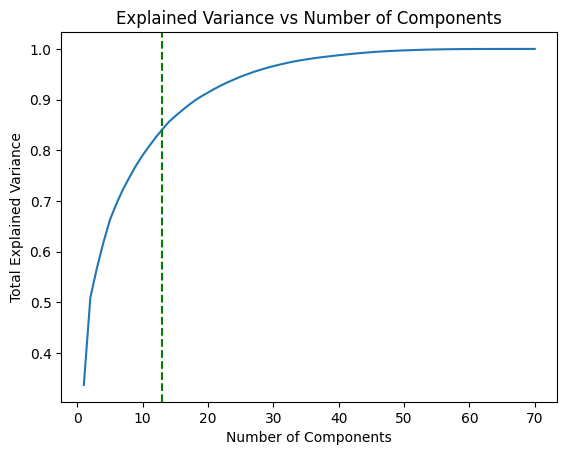

In [13]:
from matplotlib import pyplot as plt 
# Plot the explained variance versus the number of components
x = np.arange(1,len(explained_variance) + 1)
y = explained_variance
plt.xlabel("Number of Components")
plt.ylabel("Total Explained Variance") 
plt.title("Explained Variance vs Number of Components")
plt.plot(x,y) 
# plt.axhline(y=13, color='r', linestyle='--')
plt.axvline(x=13, color='g', linestyle='--')
plt.savefig('explained_variance_plot.png')
# plt.show()

In [14]:
pca = PCA(n_components = 13)
pca.fit_transform(arr)
print(pca.explained_variance_ratio_)

[0.33728201 0.1721948  0.0581613  0.05070828 0.04461961 0.03194775
 0.02822556 0.02413947 0.02282817 0.02018547 0.01797425 0.01718973
 0.01564634]


In [15]:
print(pca.components_[0])
len(pca.components_[0])

[ 0.04218809  0.01367293  0.02101286  0.07441726  0.0389478   0.0247549
 -0.01569048  0.01867794  0.00828478 -0.01521767  0.04298372  0.05229414
  0.09725381 -0.02855497  0.05867834  0.28404823  0.01364976  0.15087185
  0.01866752  0.0158875   0.15934022  0.02069012  0.06451948 -0.00942775
  0.23322535  0.23501111  0.21318183  0.24861108  0.10555065  0.2776366
  0.21391439  0.22534421  0.22111483  0.03621392  0.1353979   0.14172027
  0.06190413  0.15619879  0.15422438  0.10065961  0.08661929  0.15088684
  0.13863991  0.13879717  0.18358457  0.15935686  0.06452678  0.15145771
  0.22220215  0.09917935  0.02325518  0.03804379  0.09725863  0.09549105
  0.08190406  0.06788467  0.05861297  0.07888199  0.06784274 -0.02005179
  0.01587416  0.00449028  0.06439498  0.04540625  0.02073328 -0.00938521
  0.0203035  -0.04543273  0.04805129  0.10734602]


70

In [16]:
all_data = all_data.drop(columns = ['YEAR','PLAYER'])
all_data

,advanced_OFFRTG,advanced_DEFRTG,advanced_NETRTG,advanced_AST%,advanced_AST/TO,advanced_AST RATIO,advanced_OREB%,advanced_DREB%,advanced_REB%,advanced_TO RATIO,...,usage_%DREB,usage_%REB,usage_%AST,usage_%TOV,usage_%STL,usage_%BLK,usage_%BLKA,usage_%PF,usage_%PFD,usage_%PTS
0,99.4,100.6,-1.3,6.8,0.42,5.9,8.0,18.4,13.1,14.0,...,30.1,29.5,9.0,25.6,26.7,10.6,26.8,25.0,4.2,27.2
1,105.3,97.0,8.3,5.8,1.51,14.2,8.0,16.0,12.0,9.4,...,24.2,25.6,8.7,10.5,19.1,7.7,14.0,16.8,1.9,10.4
2,97.5,95.9,1.5,20.2,2.12,23.8,2.3,10.1,6.1,11.2,...,16.3,13.8,28.0,17.6,29.1,10.8,14.4,19.4,0.8,17.1
3,100.0,106.8,-6.8,4.5,0.55,5.9,9.4,10.9,10.1,10.7,...,17.3,22.1,7.0,15.6,23.3,15.6,31.6,20.1,1.2,19.9
4,101.4,99.2,2.3,13.0,1.20,12.4,1.3,7.4,4.5,10.3,...,11.6,10.4,17.7,20.0,15.5,5.1,16.2,14.1,2.0,26.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12120,0.0,150.0,-150.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12121,81.3,88.2,-7.0,0.0,0.00,0.0,0.0,9.1,4.5,0.0,...,20.0,14.3,0.0,0.0,0.0,0.0,33.3,0.0,0.0,0.0
12122,183.3,100.0,83.3,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12123,128.6,62.5,66.1,100.0,0.00,50.0,50.0,0.0,28.6,0.0,...,0.0,40.0,100.0,0.0,50.0,0.0,50.0,0.0,50.0,22.2


In [17]:
sample_list = pca.components_[0]
## create a dummy list with the absolute value in the original list
dummy_list = [abs(x) for x in sample_list]
index = [sorted(dummy_list).index(x) for x in dummy_list]

for i in range(len(index)):
    if index[i] < 65:
        sample_list[i] = 0
new_pca_matrix = sample_list

In [18]:
for i in range(1,13):
    sample_list = pca.components_[i]
    ## create a dummy list with the absolute value in the original list
    dummy_list = [abs(x) for x in sample_list]
    index = [sorted(dummy_list).index(x) for x in dummy_list]

    for j in range(len(index)):
        if index[j] < 65:
            sample_list[j] = 0
    new_pca_matrix = np.vstack((new_pca_matrix,sample_list))


In [19]:
new_pca_matrix_df = pd.DataFrame(new_pca_matrix,columns =list(all_data.columns))
new_pca_matrix_df

,advanced_OFFRTG,advanced_DEFRTG,advanced_NETRTG,advanced_AST%,advanced_AST/TO,advanced_AST RATIO,advanced_OREB%,advanced_DREB%,advanced_REB%,advanced_TO RATIO,...,usage_%DREB,usage_%REB,usage_%AST,usage_%TOV,usage_%STL,usage_%BLK,usage_%BLKA,usage_%PF,usage_%PFD,usage_%PTS
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.236523,0.000000,...,0.000000,0.243126,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.364936
3,0.000000,-0.485563,0.348730,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.339571,0.0,0.274068,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.355399,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.0,0.225276,0.0,0.0,0.000000,0.000000,...,0.257472,0.215897,0.000000,0.0,0.000000,0.000000,0.0,0.000000,-0.235777,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
7,0.388338,0.000000,0.300441,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.313716,0.000000,0.0,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.0,0.232137,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.387185,0.0,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [20]:
new_pca_matrix_df.to_excel('./new_pca_matrix.xlsx')

In [21]:
new_pca_matrix[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.28404823, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.23322535,
       0.23501111, 0.        , 0.24861108, 0.        , 0.2776366 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [22]:
pca_transformed_data = np.empty([len(arr),13])

In [23]:
n_col = 13
n_row = len(arr)
for i in range(n_col):
    for j in range(n_row):
        original_data = arr[j]
        multiplier = new_pca_matrix[i]
        pca_data = sum(x*y for x, y in list(zip(original_data, multiplier)))
        pca_transformed_data[j,i] = pca_data

print(pca_transformed_data)

[[ 0.63445808  0.33425666  1.22262115 ...  0.19916213  0.07140034
   0.19474872]
 [ 0.61528473  0.39036399  0.51555656 ...  0.10243358  0.22510242
   0.28195188]
 [ 0.63941573 -0.0616924   0.80516381 ...  0.18863039  0.17086522
   0.16160347]
 ...
 [ 0.09118692  0.          0.         ... -0.33617329  0.29600506
   0.58887218]
 [ 0.03477538  0.67980804  0.59539128 ...  0.28780918  0.34560891
   0.08094895]
 [ 0.26479312  0.          0.         ... -0.11355607  0.04453896
   0.10550796]]


In [24]:
all_data = pd.read_excel('./pdata/all_data.xlsx')

In [25]:
index_values = list(all_data["PLAYER"])
column_names = ["PCA_1","PCA_2","PCA_3","PCA_4","PCA_5","PCA_6","PCA_7","PCA_8","PCA_9","PCA_10","PCA_11","PCA_12","PCA_13"]
df_pca_transformed = pd.DataFrame(data = pca_transformed_data,
                                 index = index_values,
                                 columns = column_names)


In [26]:
df_pca_transformed.to_excel('./pca_transformed_data.xlsx')

In [27]:
import umap

# Assuming 'all_data' is your DataFrame with all the data loaded into it
scalered_data_by_year = {}
START_YEAR = 2000
END_YEAR = 2024

for i in range(START_YEAR, END_YEAR + 1):
    # Select the data from that year
    df = all_data[all_data["YEAR"] == i]
    df = df.drop(columns=["PLAYER", "YEAR"])
    # Convert numeric cols that are formatted as strings to float
    for col in df.columns:
        df[col] = df[col].astype(str).replace(',', '', regex=True).astype(float)  # remove commas then convert

    df_array = df.to_numpy()
    scaler = MinMaxScaler()
    scaler.fit(df_array)
    scalered_df = scaler.transform(df_array)
    scalered_data_by_year[i] = scalered_df

# Merge all the arrays into one
arr = scalered_data_by_year[START_YEAR]
for i in range(START_YEAR + 1, END_YEAR + 1):
    arr = np.vstack((arr, scalered_data_by_year[i]))

# Implement UMAP
umap_reducer = umap.UMAP()
umap_embedding = umap_reducer.fit_transform(arr)

# Check the shape of the output to see how dimensions have been reduced
print(umap_embedding.shape)


/home/jrgw/CS5806_ML2/project/machinelearning-sportsanalysis/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(12125, 2)


/home/jrgw/CS5806_ML2/project/machinelearning-sportsanalysis/venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/jrgw/CS5806_ML2/project/machinelearning-sportsanalysis/venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/jrgw/CS5806_ML2/project/machinelearning-sportsanalysis/venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/jrgw/CS5806_ML2/project/machine

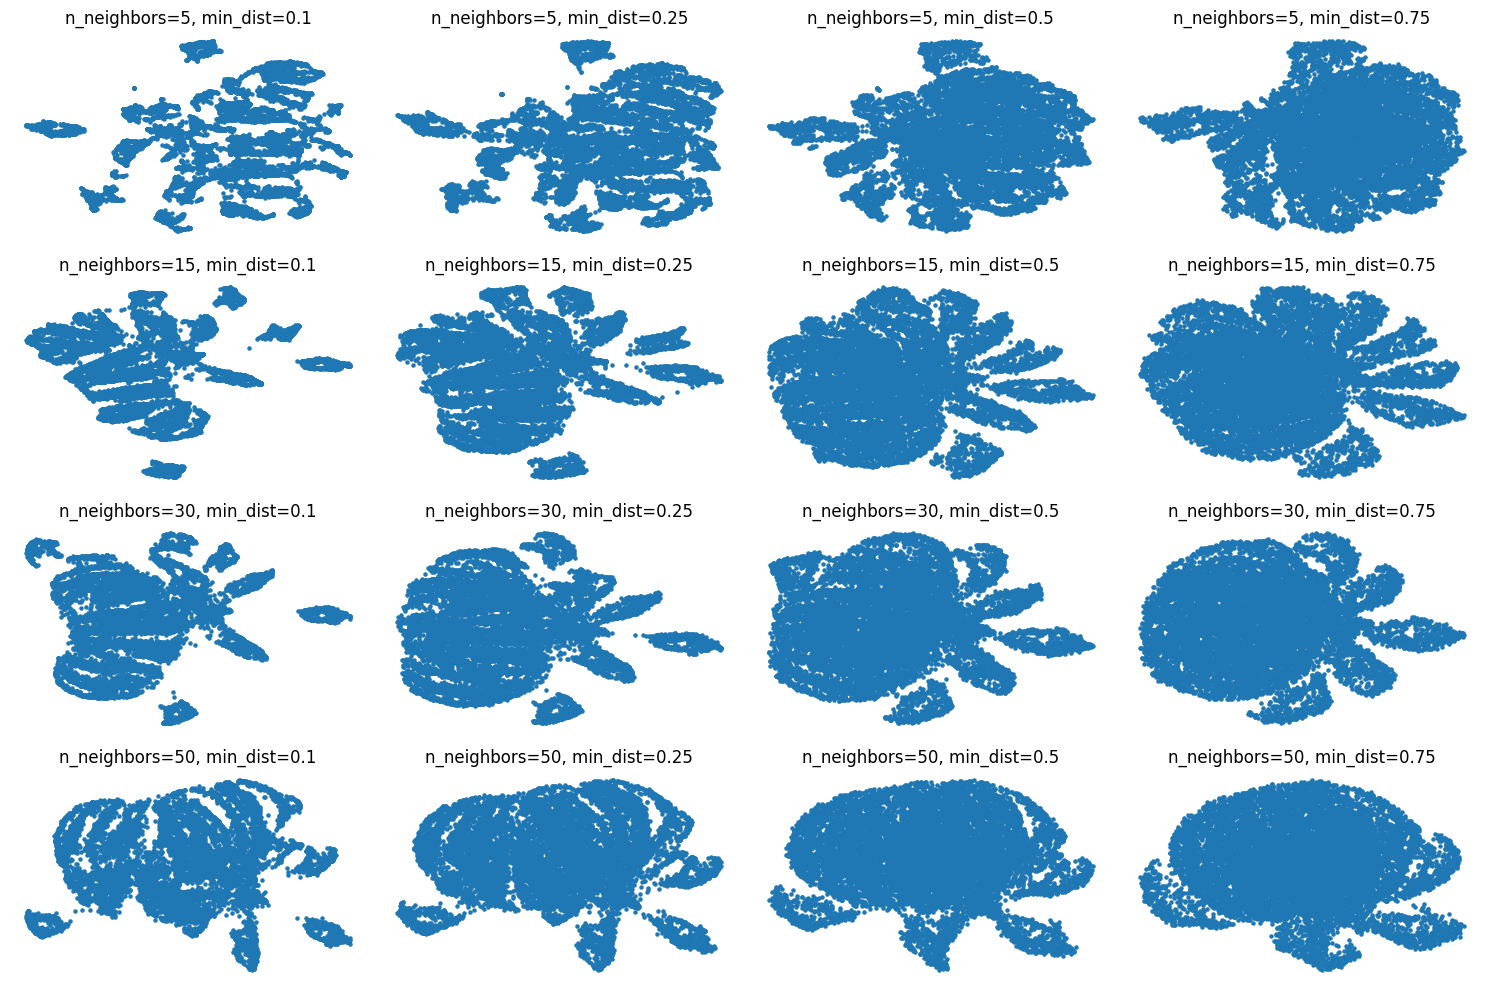

In [28]:
import matplotlib.pyplot as plt

# Range of parameters to try
n_neighbors_options = [5, 15, 30, 50]
min_dist_options = [0.1, 0.25, 0.5, 0.75]

fig, axes = plt.subplots(len(n_neighbors_options), len(min_dist_options), figsize=(15, 10))

for i, n_neighbors in enumerate(n_neighbors_options):
    for j, min_dist in enumerate(min_dist_options):
        umap_reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
        umap_embedding = umap_reducer.fit_transform(arr)
        
        ax = axes[i][j]
        ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=5)
        ax.set_title(f'n_neighbors={n_neighbors}, min_dist={min_dist}')
        ax.axis('off')

plt.tight_layout()
plt.show()

/home/jrgw/CS5806_ML2/project/machinelearning-sportsanalysis/venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


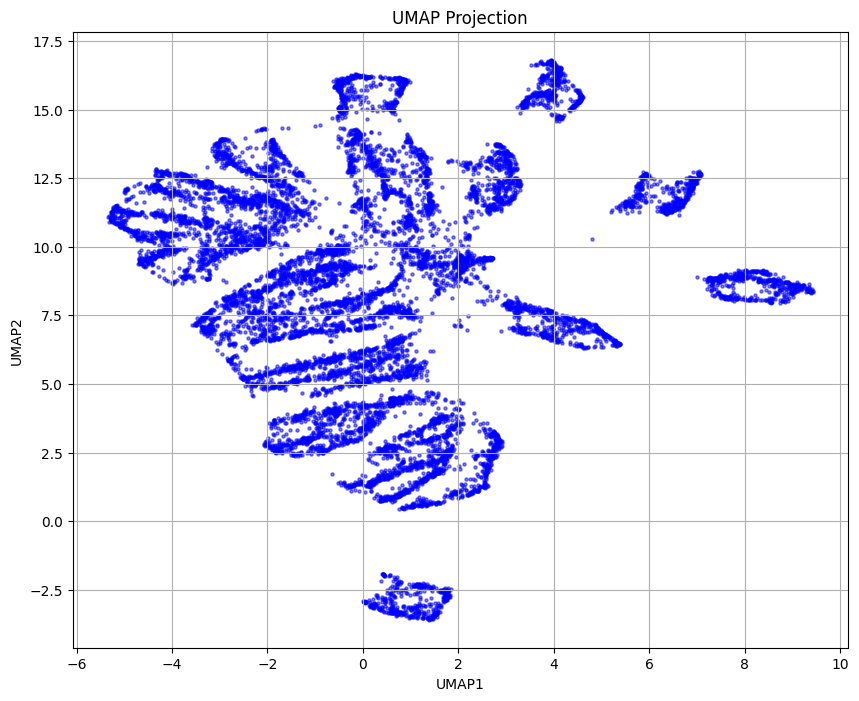

In [29]:
# Choose parameters based on the exploration
n_neighbors = 15
min_dist = 0.1

umap_reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
umap_embedding = umap_reducer.fit_transform(arr)

plt.figure(figsize=(10, 8))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=5, c='blue', alpha=0.5)
plt.title('UMAP Projection')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.grid(True)
plt.show()


In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import umap
import matplotlib.pyplot as plt

# Assuming 'all_data' is your DataFrame with all data loaded into it
scalered_data_by_year = {}
player_info_by_year = {}  # To store player names
START_YEAR = 2000
END_YEAR = 2024
for i in range(START_YEAR, END_YEAR + 1):
    # Select the data and player names from that year
    df = all_data[all_data["YEAR"] == i]
    player_names = df['PLAYER'].values  # Save player names
    df = df.drop(columns=["PLAYER", "YEAR"])
    
    # Convert numeric cols that are formatted as strings to float
    for col in df.columns:
        df[col] = df[col].astype(str).replace(',', '', regex=True).astype(float)  # remove commas then convert
    
    df_array = df.to_numpy()
    scaler = MinMaxScaler()
    scaler.fit(df_array)
    scalered_df = scaler.transform(df_array)
    
    scalered_data_by_year[i] = scalered_df
    player_info_by_year[i] = player_names  # Store player names in a dictionary

# Merge all arrays and player information into one
arr = scalered_data_by_year[START_YEAR]
players = player_info_by_year[START_YEAR]
for i in range(START_YEAR + 1, END_YEAR + 1):
    arr = np.vstack((arr, scalered_data_by_year[i]))
    players = np.concatenate((players, player_info_by_year[i]))

/home/jrgw/CS5806_ML2/project/machinelearning-sportsanalysis/venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


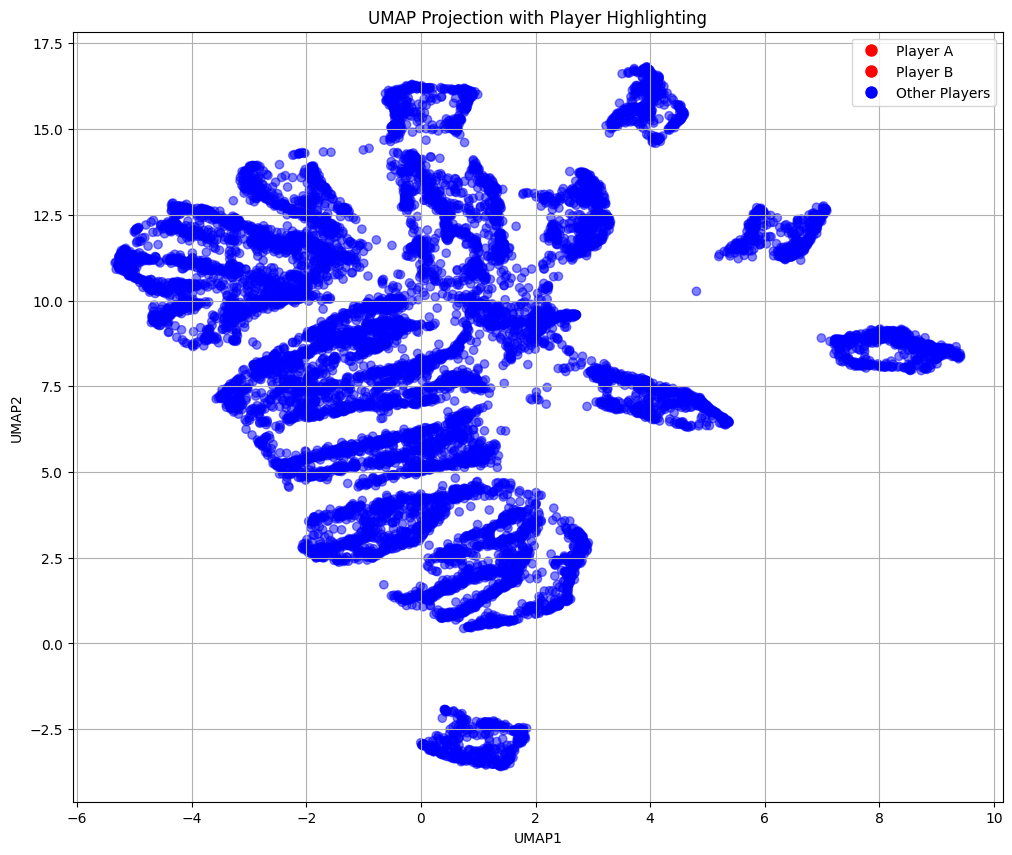

In [32]:
# UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_embedding = umap_reducer.fit_transform(arr)

# Creating a color map for specific players
highlight_players = ['Player A', 'Player B']  # Specify the names of players to highlight
colors = ['red' if player in highlight_players else 'blue' for player in players]

plt.figure(figsize=(12, 10))
scatter = plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=colors, alpha=0.5)
plt.title('UMAP Projection with Player Highlighting')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.grid(True)

# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Player A',
                          markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Player B',
                          markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Other Players',
                          markerfacecolor='blue', markersize=10)]
plt.legend(handles=legend_elements, loc='best')
plt.savefig('umap_projection_with_player_highlighting.png')

/tmp/ipykernel_23220/2863254255.py:24: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(handles=legend_elements, loc='best')


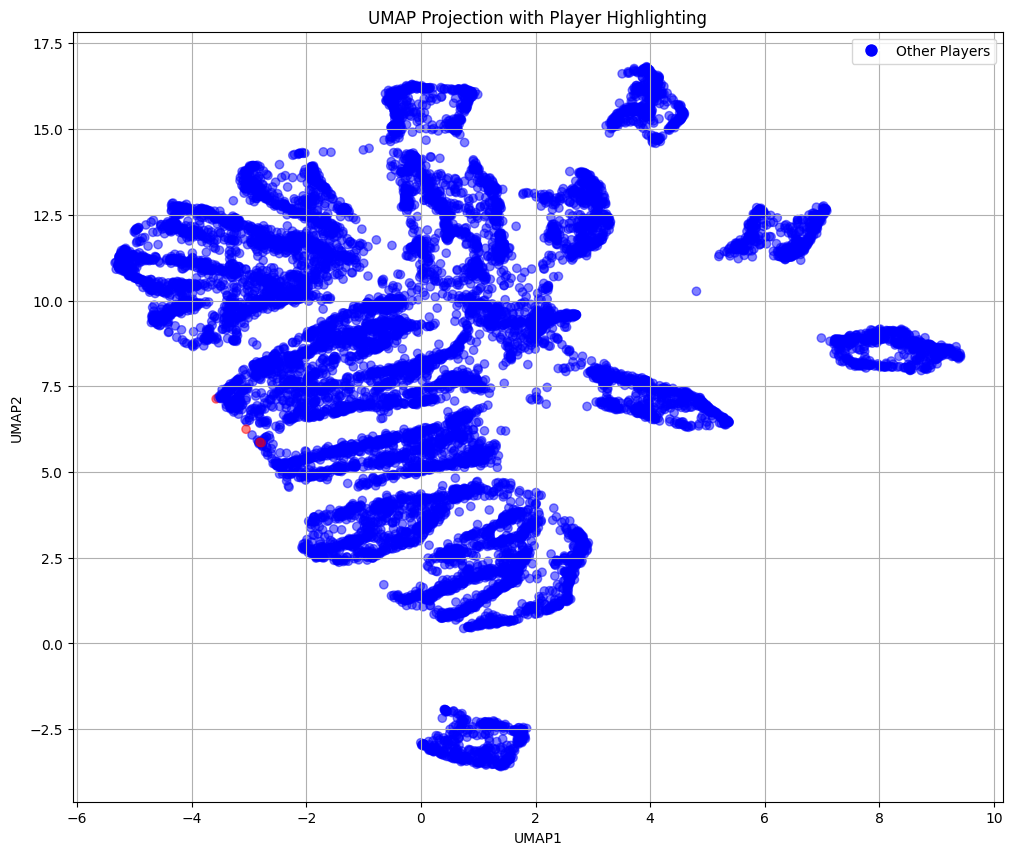

In [34]:
# Creating a color map for specific players
highlight_players = ['_2024_Luka Doncic', '_2024_Shai Gilgeous-Alexander', '_2024_Nikola Jokic', '_2024_Joel Embiid']
colors = ['red' if player in highlight_players else 'blue' for player in players]

plt.figure(figsize=(12, 10))
scatter = plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=colors, alpha=0.5)
plt.title('UMAP Projection with Player Highlighting')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.grid(True)

# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='_2024_Luka Doncic',
                          markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='_2024_Shai Gilgeous-Alexander',
                          markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='_2024_Nikola Jokic',
                          markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='_2024_Joel Embiid',
                          markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Other Players',
                          markerfacecolor='blue', markersize=10)]
plt.legend(handles=legend_elements, loc='best')
plt.savefig('umap_projection_with_player_highlighting.png')